Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce "Download ourcomplete COVID-19 dataset". Scaricare il dataset nel formato che si preferisce.

1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

2. Si chiede di trovare, per ogni continente:
   
   a. il numero di casi fin dall'inizio della pandemia
   
   b. la percentuale rispetto al totale mondiale del numero di casi

3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:

   a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
   
   b. il numero di nuovi casi rispetto alla data
   
   (poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni)

4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

   a. scrivere un breve commento a riguardo


5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:

   a. mostrare la somma dei pazienti ospitalizzati per ognuna

   b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [2]:
#importo i pacchetti necessari
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#leggo il dataset in forma di dataframe direttamente dal browser
covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [6]:
#do un'occhiata al dataframe
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [9]:
#1) Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [11]:
#stampo le dimensioni del dataset
covid.shape

(429435, 67)

In [13]:
#stampo tutte le colonne presenti nel dataset
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [15]:
#per avere piu' informazioni, uso il metodo .info()
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [17]:
#per informazioni piu' dettagliate sul numero di elementi nulli per colonna, oltre al tipo dei dati, uso:
for col in covid.columns:
    print(col.upper()) 
    print(f"Tipo: {covid[col].dtype}")
    print(f"Numero di nulli: {covid[col].isna().sum()}")
    print("\n")

ISO_CODE
Tipo: object
Numero di nulli: 0


CONTINENT
Tipo: object
Numero di nulli: 26525


LOCATION
Tipo: object
Numero di nulli: 0


DATE
Tipo: object
Numero di nulli: 0


TOTAL_CASES
Tipo: float64
Numero di nulli: 17631


NEW_CASES
Tipo: float64
Numero di nulli: 19276


NEW_CASES_SMOOTHED
Tipo: float64
Numero di nulli: 20506


TOTAL_DEATHS
Tipo: float64
Numero di nulli: 17631


NEW_DEATHS
Tipo: float64
Numero di nulli: 18827


NEW_DEATHS_SMOOTHED
Tipo: float64
Numero di nulli: 20057


TOTAL_CASES_PER_MILLION
Tipo: float64
Numero di nulli: 17631


NEW_CASES_PER_MILLION
Tipo: float64
Numero di nulli: 19276


NEW_CASES_SMOOTHED_PER_MILLION
Tipo: float64
Numero di nulli: 20506


TOTAL_DEATHS_PER_MILLION
Tipo: float64
Numero di nulli: 17631


NEW_DEATHS_PER_MILLION
Tipo: float64
Numero di nulli: 18827


NEW_DEATHS_SMOOTHED_PER_MILLION
Tipo: float64
Numero di nulli: 20057


REPRODUCTION_RATE
Tipo: float64
Numero di nulli: 244618


ICU_PATIENTS
Tipo: float64
Numero di nulli: 390319


ICU_PA

In [20]:
#2.a) per ogni continente, numero di casi fin dall'inizio della pandemia

In [22]:
#la viariabile (colonna) che mi interessa e' "new_cases"
#raggruppo per continente e faccio la somma di "new_cases"
covid.groupby("continent")["new_cases"].sum()

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

In [24]:
#2.b) per ogni continente, la percentuale rispetto al totale mondiale del numero di casi

In [26]:
#raggruppo per continente e prendo la somma di "new_cases". Per il totale mondiale dei casi faccio un'ulteriore somma su tutti i continenti
(covid.groupby("continent")["new_cases"].sum()/covid.groupby("continent")["new_cases"].sum().sum()*100).round(2)

continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: new_cases, dtype: float64

N.B.: La somma delle percentuali non è precisamente 100 perché ho arrotondato a due cifre decimali nel passaggio precedente.

In [29]:
#somma delle percentuali relative ai vari continenti:
(covid.groupby("continent")["new_cases"].sum()/covid.groupby("continent")["new_cases"].sum().sum()*100).round(2).sum()

99.99000000000001

In [32]:
#3) Selezionare i dati relativi all'Italia nel 2022

In [34]:
#le date in "date" sono in formato object
#le trasformo in formato datetime e le salvo nella colonna "date_t"
covid["date_t"] = pd.to_datetime(covid["date"])
covid.date_t

0        2020-01-05
1        2020-01-06
2        2020-01-07
3        2020-01-08
4        2020-01-09
            ...    
429430   2024-07-31
429431   2024-08-01
429432   2024-08-02
429433   2024-08-03
429434   2024-08-04
Name: date_t, Length: 429435, dtype: datetime64[ns]

In [36]:
#filtro i dati relativi all'Italia e al 2022
filtro_it_22 = (covid.location == "Italy") & (covid.date_t.dt.year == 2022)

In [38]:
#verifico la selezione
covid.loc[filtro_it_22,["location","date"]]

,location,date
186002,Italy,2022-01-01
186003,Italy,2022-01-02
186004,Italy,2022-01-03
186005,Italy,2022-01-04
186006,Italy,2022-01-05
...,...,...
186362,Italy,2022-12-27
186363,Italy,2022-12-28
186364,Italy,2022-12-29
186365,Italy,2022-12-30


In [40]:
#3.a) ...  mostrare con dei grafici adeguati l'evoluzione del casi totali dall'inizio alla fine dell'anno

<Axes: title={'center': 'Serie temporale dei casi totali in Italia (2022)'}, xlabel='Data', ylabel='No. casi totali'>

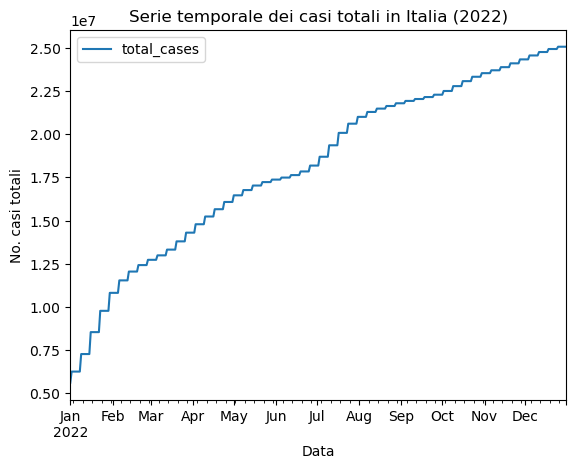

In [42]:
#serie temporale dei casi totali, o grafico comulativo dei nuovi casi
covid.loc[filtro_it_22].plot(x="date_t",y="total_cases", title="Serie temporale dei casi totali in Italia (2022)", xlabel="Data", ylabel="No. casi totali")

* Qui si vede che il numero di casi totali rimane costante all'interno di ciascuna settimana. Ha senso allora filtrare via i dati che non hanno misurazioni prima di andare a mostrare la serie temporale dei nuovi casi.

In [45]:
#filtro via i dati che non hanno misurazioni, cioè prendo solo i dati con "new_cases">0
filtro_it_22_nc0 = (covid.location == "Italy") & (covid.date_t.dt.year == 2022) & (covid.new_cases>0)

In [47]:
#verifico
covid.loc[filtro_it_22_nc0].shape

(52, 68)

* Il dataframe filtrato contiente solo 52 righe. Ha senso dato che ci sono 52 settimane in un anno e un solo dato di "new_cases" è >0 per ogni settimana.

In [51]:
# 3.b) ... il numero di nuovi casi rispetto alla data

<Axes: title={'center': 'Serie temporale dei nuovi casi in Italia (2022)'}, xlabel='Data', ylabel='No. nuovi casi'>

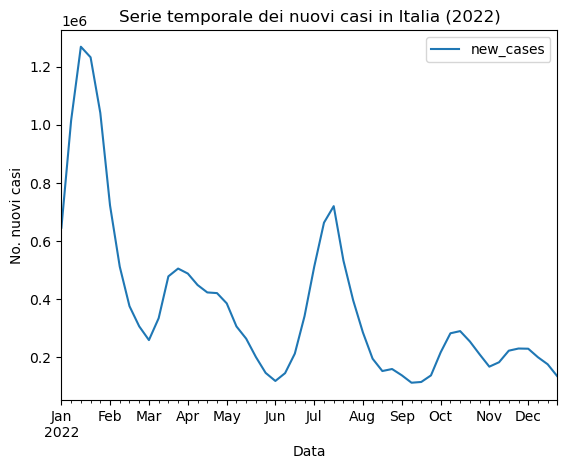

In [53]:
#serie temporale dei nuovi casi
covid.loc[filtro_it_22_nc0].plot(x="date_t",y="new_cases", title="Serie temporale dei nuovi casi in Italia (2022)", xlabel="Data", ylabel="No. nuovi casi")

<Axes: title={'center': 'Serie temporale dei casi totali in Italia (2022)'}, xlabel='Data', ylabel='No. casi totali'>

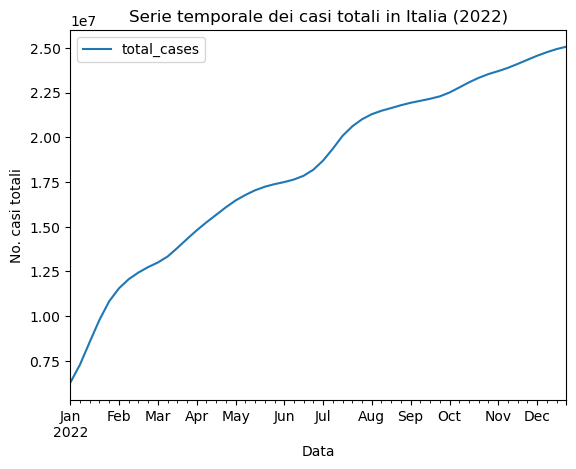

In [55]:
#a questo punto rifaccio il grafico dei casi totali, usando il filtro "new_cases">0
covid.loc[filtro_it_22_nc0].plot(x="date_t",y="total_cases", title="Serie temporale dei casi totali in Italia (2022)", xlabel="Data", ylabel="No. casi totali")

* Il grafico non presenta più gli scalini di prima ma è una linea continua dato che abbiamo rimosso le istanze in cui c'erano degli stessi valori all'interno della stessa settimana.

In [62]:
#4.) Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni 
#riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)

In [64]:
#creo le due date che mi servono e le converto in formato datetime
date1 = "01-05-2022"
date2 = "01-05-2023"
date1 = pd.to_datetime(date1, dayfirst=True)
date2 = pd.to_datetime(date2, dayfirst=True)

In [66]:
#verifico le date
print(date1)
print(type(date1))
print(date2)
print(type(date2))

2022-05-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2023-05-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [68]:
#creo un filtro per i paesi interessati e l'intervallo temporale
filtro_IGF_mag22_apr23 = ((covid.location=="Italy") | (covid.location=="Germany") | (covid.location=="France")) & (covid.date_t >= date1) & (covid.date_t <date2)

In [70]:
#verifico il filtro
covid.loc[filtro_IGF_mag22_apr23,["location","date"]]

,location,date
131214,France,2022-05-01
131215,France,2022-05-02
131216,France,2022-05-03
131217,France,2022-05-04
131218,France,2022-05-05
...,...,...
186482,Italy,2023-04-26
186483,Italy,2023-04-27
186484,Italy,2023-04-28
186485,Italy,2023-04-29


Text(0.5, 1.0, 'Box Plot dei pazienti in ICU per paese')

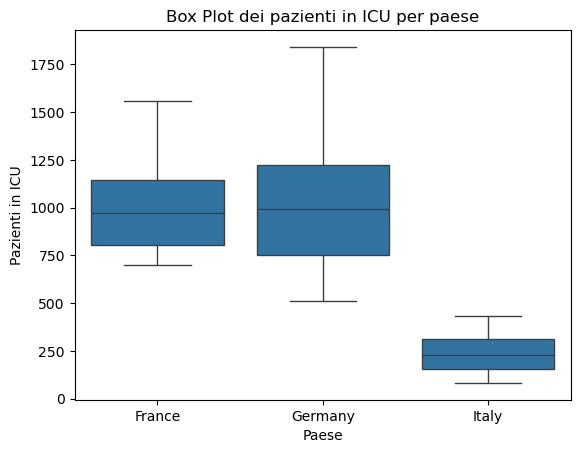

In [72]:
#creo il boxplot
sns.boxplot(data=covid[filtro_IGF_mag22_apr23], x="location", y="icu_patients")
plt.xlabel('Paese')
plt.ylabel('Pazienti in ICU')
plt.title('Box Plot dei pazienti in ICU per paese')

* Tra maggio 2022 e aprile 2023 in Italia c'è stato un numero significativamente più basso di pazienti in ICU rispetto a Francia e Germania. La mediana dei pazienti in ICU per l'Italia è circa un quarto rispetto a quella degli altri due paesi ed anche la variabilità dei dati per l'Italia è minore (l'intervallo tra il quartile di ordine 0.25 e il quartile di ordine 0.75 è più stretto).

* Lo si potrebbe spiegare con la popolazione più bassa dell'Italia rispetto agli altri due paesi.

Text(0.5, 1.0, 'Box Plot dei pazienti in ICU per milione per paese')

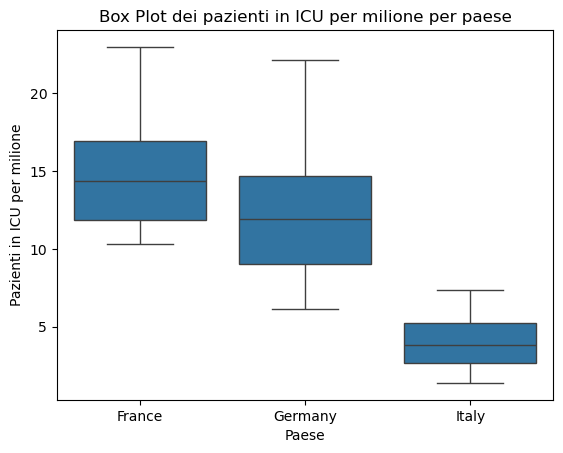

In [76]:
#andiamo a guardare "icu_patients_per_million"
sns.boxplot(data=covid[filtro_IGF_mag22_apr23], x="location", y="icu_patients_per_million")
plt.xlabel('Paese')
plt.ylabel('Pazienti in ICU per milione')
plt.title('Box Plot dei pazienti in ICU per milione per paese')

* Anche il numero di pazienti in ICU (normalizzato per milione di abitanti) è significativamente più basso per l'Italia rispetto agli altri due paesi. Si può concludere che l'Italia ha ammesso in ICU molti meno pazieni rispetto a Francia e Germania tra il maggio 2022 e aprile 2023.

In [80]:
#5.) Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:

In [82]:
#filtro i dati per i paesi interessati e l'anno 2023
filtro_IGFS_23 = ((covid.location=="Italy") | (covid.location=="Germany") | (covid.location=="France") | (covid.location=="Spain")) & (covid.date_t.dt.year == 2023)

In [84]:
#5.a) mostrare la somma dei pazienti ospitalizzati per ognuna
#5.b) se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [86]:
#la variabile (colonna) che ci interessa è "weekly_hosp_admissions" (pazienti ospitalizzati per settimana). Raggruppo per paese e poi sommo su tutte le istanze di ospitalizzazione del 2023, cioè su tutte le settimane:
covid.loc[filtro_IGFS_23].groupby("location")["weekly_hosp_admissions"].sum()

location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64

* La prima considerazione da fare è che ha senso che ci sia un solo dato non nullo di "weekly_hosp_admissions" per ogni settimana di dati raccolti, dato che le ammissioni in ospedale venivano registrate con cadenza settimanale. Però potrebbero esserci altri dati nulli.

Text(0.5, 0, 'Data')

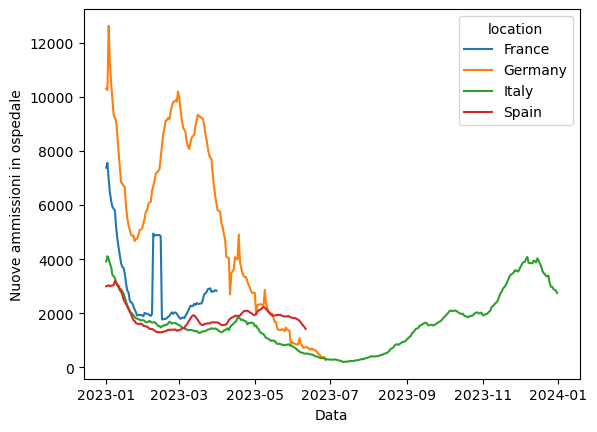

In [90]:
#andiamo a vedere se ci sono altri dati nulli in "weekly_hosp_admissions"
sns.lineplot(data=covid.loc[filtro_IGFS_23], x="date_t", y="weekly_hosp_admissions", hue="location")
plt.ylabel("Nuove ammissioni in ospedale")
plt.xlabel("Data")

* Solo per l'Italia sono presenti dati per l'intero anno. Per gli altri paesi i dati si interrompono ad aprile (Francia) o ad inizio estate (Spagna e Germania).

* Sembra che le ammissioni in ospedale per covid terminino nell'estate 2023 per Spagna e Germania. In questo caso sostituirei i dati nulli dopo l'interruzione con degli zeri. Altrimenti, considerando non plausibile l'azzeramento delle ammissioni in ospedale dovute al covid, potrei sostituire i dati nulli con i valori dell'Italia o di un altro paese europeo.

* Per la Francia, l'interruzione dei dati sembra piu' repentina. Sostituirei i valori nulli di "weekly_hosp_admissions" con i valori disponibili fino all'estate di Germania o Spagna. O potrei usare una media dei dati di Germania, Spagna e Italia fino a inizio estate. Per la seconda parte del 2023 vale lo stesso ragionamento fatto sopra.

* Un'altra opzione sarebbe quella di considerare la variabile "hosp_patients" che rappresenta il numero totale dei pazienti ospitalizzati ad una determinata data.

* Il numero totale di pazienti ospitalizzati si dovrebbe calcolare in questo modo: 

    pazienti totali (settimana attuale) = pazienti totali (settimana precedente) + nuovi pazienti ospitalizzati - pazienti dimessi - pazienti morti in ospedale

* Dato che non vedo il numero di pazienti dimessi e morti in ospedale nel dataset, userei come stima dei pazienti ospitalizzati la differenza dei pazienti totali ("hosp_patients") tra la settiamana considerata e la settimana precedente.

Text(0.5, 0, 'Data')

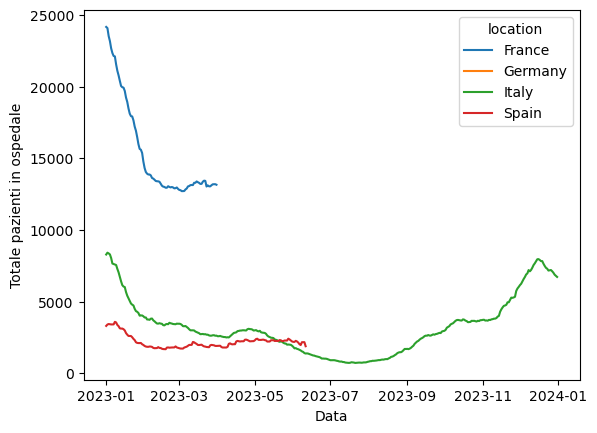

In [94]:
#diamo un'occhiata a "hosp_patients"
sns.lineplot(data=covid.loc[filtro_IGFS_23], x="date_t", y="hosp_patients", hue="location")
plt.ylabel("Totale pazienti in ospedale")
plt.xlabel("Data")

* Non abbiamo dati di "hosp_patients" per la Germania per l'intero 2023. Inoltre non abbiamo dati per la Francia dopo aprile 2023 e per la Spagna dopo giugno 2023. Quindi non possiamo utilizzare "hosp_patients" per sostituire "weekly_hosp_admissions" per la seconda parte del 2023.